# 프로젝트: 이제까지 만들었던 모델을 튜닝하고 배포하기!

이번 프로젝트는 여러분들이 배운 프로젝트중에서 CIFAR10 프로젝트를 기반으로 데이터를 수정하고 하이퍼파라미터 튜닝을 한 다음 배포하는 미션입니다!

## 0. 모델 고정해서 사용하기

이번 CIFAR10 프로젝트의 경우에는 모델을 고정해서 사용할 예정입니다. 모델의 경우에는 다음과 같은 그림으로 구성해주세요!

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/Screenshot_from_2024-01-25_12-03-51.max-800x600.png)

[이번 프로젝트에서 구성해야 하는 모델 요약]

## 1. Data Centric AI 맛보기

Data Centric AI를 공부했으니 한번 맛은 봐야겠죠? Data Centric AI를 정석적으로 진행한다면 훈련 데이터셋과 테스트 데이터셋을 전부 열어서 확인해서 틀린 것이 없는지 검수해야 합니다.  
하지만 우리에게는 일일이 해볼만한 시간은 존재하지 않으니 사람들이 미리 검수했던 내용들을 기반으로 프로젝트를 진행하겠습니다.

- [labelerrors.com](https://labelerrors.com/)

labelerrors.com은 Data Centric AI에서 가장 많이 활용하고 있는 파이썬 라이브러리인 cleanlab을 만든 개발자들이 공개한 사이트입니다. labelerrors.com은 이름에서 알 수 있듯이 **테스트 데이터**와 label이 잘못 붙어 있는 사례를 모아 보여줍니다.  
labelerrors.com에서 CIFAR10 테스트 데이터셋을 확인하고 아래 조그맣게 있는 ID를 기준으로 직접 데이터셋을 시각화하고 실제 label이 잘못 붙어있다면 label을 수정해주세요.

![content img](https://d3s0tskafalll9.cloudfront.net/media/original_images/Screenshot_from_2024-01-25_12-14-23.png)

[labelerrors.com에 있는 Image 예시]

## 2. 하이퍼파라미터 튜닝

위에 있는 모델을 기반으로 KerasTuner로 하이퍼파라미터 튜닝을 진행합니다. 튜닝한 하이퍼 파라미터로 학습을 진행하고 모델을 SavedModel 형식으로 저장해주세요.

(주의사항)  
하이퍼 파라미터를 어느정도 범위로 주는지에 따라서 모델 튜닝속도가 달라집니다.  
학습시간을 고려해서 하이퍼 파라미터 튜닝을 세팅해주세요!

---

## 3. 모델 배포하기 (옵션)

하이퍼파라미터 튜닝을 끝낸 모델을 Docker 혹은 WSL2 환경에서 TFServing을 진행해 모델을 배포하세요! 모델 배포가 성공했다면 해당 코드쉘을 캡쳐해서 이미지를 주피터 노트북에 넣어주세요!

---

## 4. TFLite 모델 만들기 (옵션)

여러분들이 만든 모델을 TFLite 모델로 만들어서 저장하고 서명을 확인하는 메소드까지 입력해주세요!

---

## (추가미션) 박찬성님의 TFX 프로젝트 분석해보기

![content img](https://d3s0tskafalll9.cloudfront.net/media/images/TFX.max-800x600.png)

[박찬성님의 TFX 프로젝트]

[박찬성님의 프로젝트 : semantic-segmentation-ml-pipeline](https://github.com/deep-diver/semantic-segmentation-ml-pipeline)

이번 노드에서 TensorFlow Extended에 대한 컴포넌트 소개를 했지만 각각 컴포넌트가 어떻게 작동하는지 코드를 보지 않았습니다.  
현재 Machine Learning GDE(Google Developers Expert)이자 Hugging Face Fellow로 활동하고 계신 박찬성님은 전세계적으로 손꼽히는 TFX를 잘 다루는 유저입니다.  
위에 올린 깃헙주소의 경우 박찬성님께서 진행한 TFX 프로젝트중 하나로 Semantic Segmentation 모델을 사용한 ML 파이프라인 제작 프로젝트입니다.

해당 프로젝트를 분석한다면 여러분들께서 TFX에 대한 이해도가 높아져서 TFX의 매력에 빠지게 될거라는 생각이 듭니다!

만일 1번부터 3번까지 프로젝트를 다 진행하셨다면 추가미션을 통해 TFX를 이해하는 시간을 가졌으면 좋겠습니다!

오늘도 수고하셨습니다!

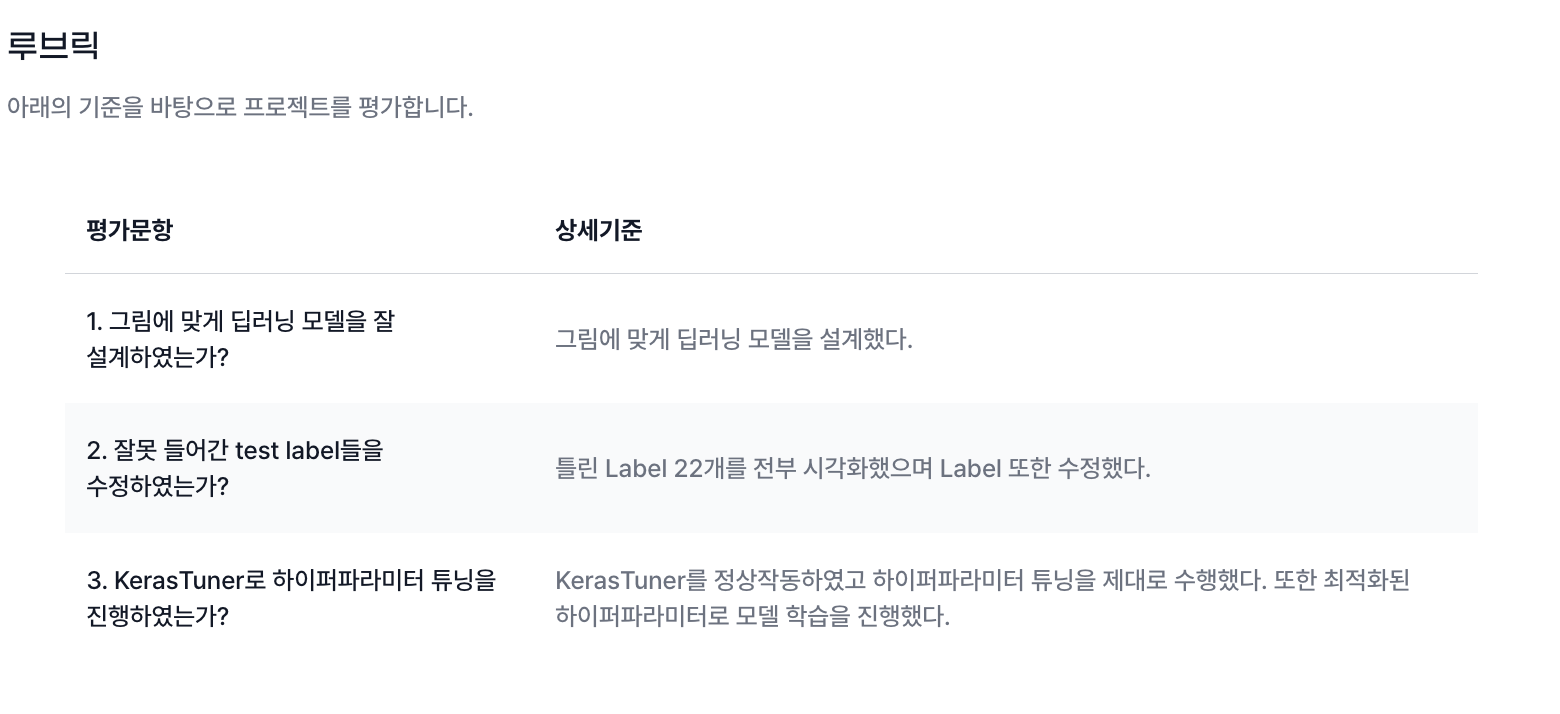

In [4]:
!mkdir ~/aiffel/mlops
!pip install keras-tuner

mkdir: cannot create directory ‘/aiffel/aiffel/mlops’: File exists


In [5]:
import tensorflow as tf
import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
import os

In [3]:
# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


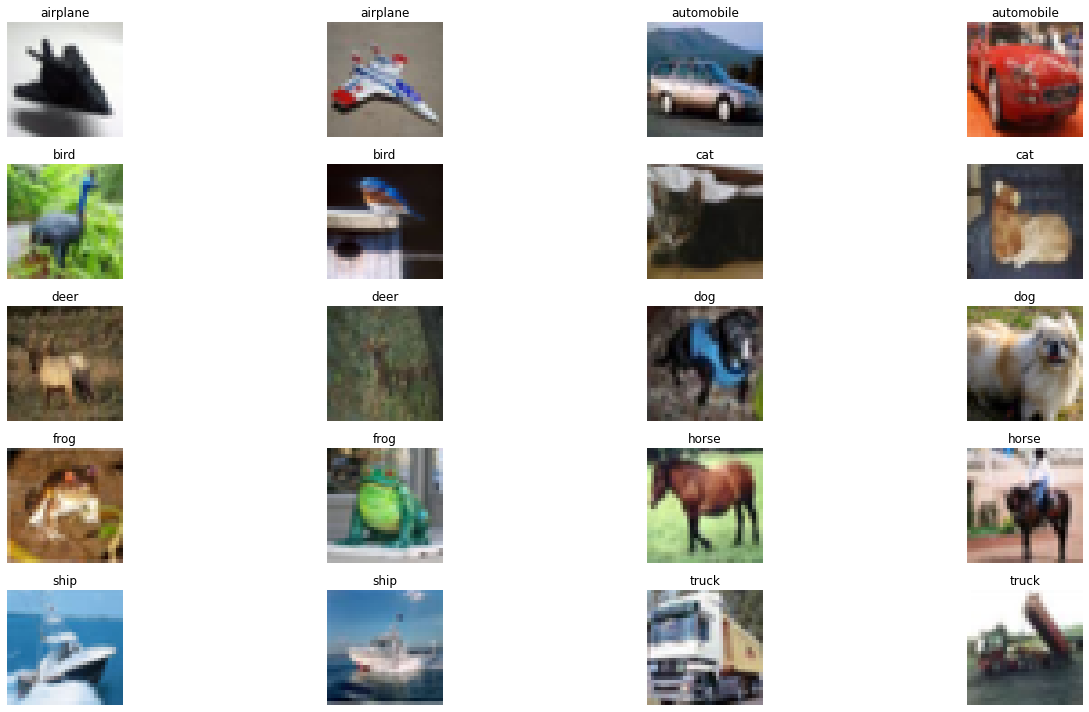

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 클래스명 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 각 클래스별로 2개의 이미지 인덱스 찾기
indices_to_visualize = []
for class_index in range(len(class_names)):
    indices = np.where(y_train == class_index)[0][:2]  # 각 클래스의 첫 2개 인덱스
    indices_to_visualize.extend(indices)

# 이미지 시각화
plt.figure(figsize=(20, 10))
for idx, image_index in enumerate(indices_to_visualize):
    plt.subplot(len(class_names) // 2, 4, idx + 1)  # 이미지 배치
    plt.imshow(x_train[image_index])
    plt.title(class_names[y_train[image_index][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

https://labelerrors.com/ 라벨 에러에 대한 사이트에 있는 것을 확인하고 , 수정하는 코드

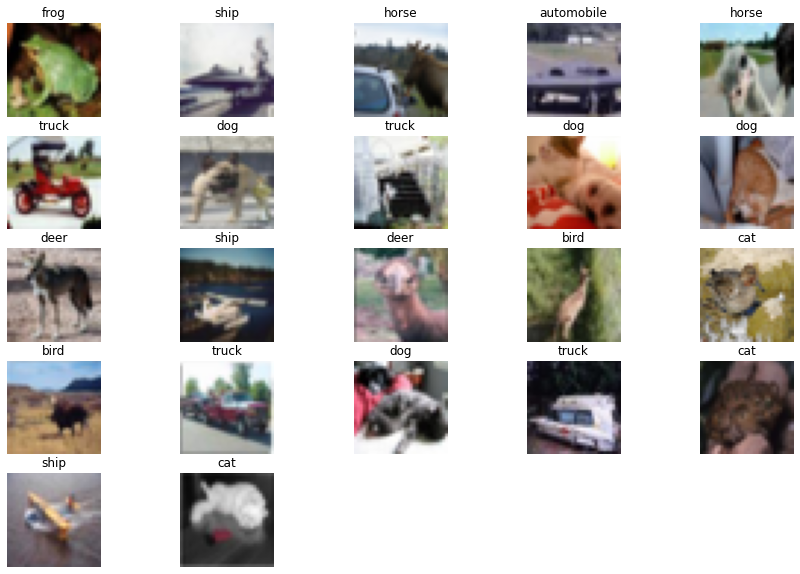

In [12]:
# 클래스명 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

new_class_names = ['frog', 'ship', 'horse', 'automobile', 'horse', 'truck', 'dog', 'truck', 'dog', 'dog', 'deer', 'ship', 'deer', 'bird', 'cat', 'bird', 'truck', 'dog', 'truck', 'cat', 'ship', 'cat']

new_labels = [class_names.index(name) for name in new_class_names]

# 수정할 라벨 인덱스
label_numbers = [2405, 6877, 8058, 2532, 7657, 1969, 2804, 6792, 1227, 5191, 5690, 1718, 2592, 4794, 5960, 165, 9227, 5632, 9352, 7846, 6966, 5468]

for i, new_label in zip(label_numbers, new_labels):
    y_test[i] = new_label

# 이미지 시각화
plt.figure(figsize=(15, 10))
for idx, label_num in enumerate(label_numbers):
    plt.subplot(5, 5, idx + 1)  # 5x5 그리드에 이미지 표시
    plt.imshow(x_test[label_num])  # 이미지 표시
    plt.title(class_names[y_test[label_num][0]])  # 원래 라벨 표시
    plt.axis('off')
plt.show()

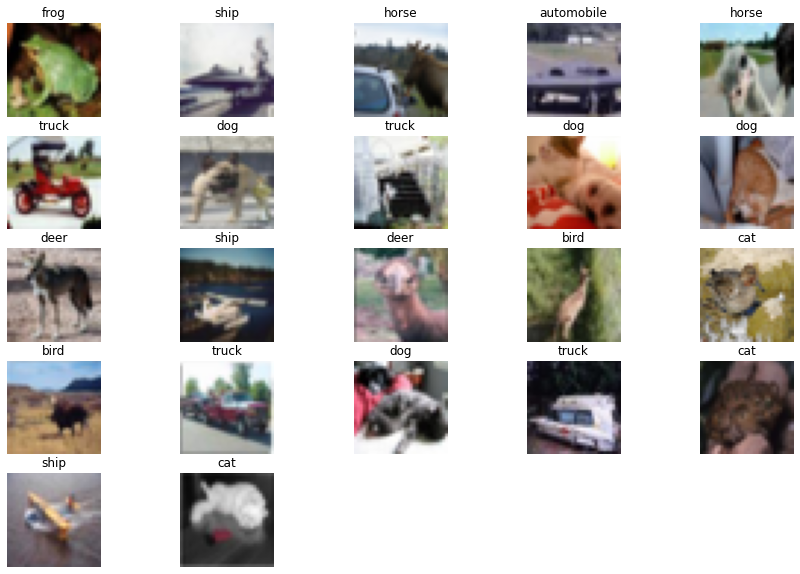

In [13]:
# 수정된 라벨 시각화
plt.figure(figsize=(15, 10))
for idx, label_num in enumerate(label_numbers):
    plt.subplot(5, 5, idx + 1)  # 5x5 그리드에 이미지 표시
    plt.imshow(x_test[label_num])  # 이미지 표시
    plt.title(class_names[y_test[label_num][0]])  # 수정된 라벨 표시
    plt.axis('off')
plt.show()

In [15]:
X_train = x_train.reshape(-1,32, 32, 3) 
X_test = x_test.reshape(-1,32,32,3)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
print(X_train.shape)

(40000, 32, 32, 3)


KerasTuner에서의 hypermodel은 모델을 공유 및 재사용하기 위해 검색 공간을 캡슐화하는 모델입니다. hypermodel의 경우 hp라는 인수를 활용해서 keras.Model을 생성합니다.
즉 hypermodel은 우리가 만들고 싶은 모델을 쌓는 과정을 거치는데 이때 하이퍼파라미터 튜닝에 대한 검색공간을 만들어줄때 hp라는 인수를 사용해서 만든 모델입니다.
hypermodel의 경우 build 메소드를 활용하면 모델이 빌드가 되면서 하이퍼파라미터 튜닝이 시작합니다.

In [17]:
class DeepTuner(kt.Tuner):
    def run_trial(self, trial, X, y, validation_data, **fit_kwargs):
        model = self.hypermodel.build(trial.hyperparameters)
        model.fit(X, y, batch_size=trial.hyperparameters.Choice(
            'batch_size', [16, 32]), **fit_kwargs)


        X_val, y_val = validation_data
        eval_scores = model.evaluate(X_val, y_val)
        return {name: value for name, value in zip(
            model.metrics_names,
            eval_scores)}

이번에는 build_model쪽을 보도록 하겠습니다.

build_model은 위에서 설명한것처럼 hypermodel을 만들어줘야 합니다. 제가 만든 hypermodel은 총 2가지 기법이 들어가 있으며 주의사항도 1가지 있습니다.

우선 주의사항부터 말씀드리면 해당 모델의 경우 hypermodel이기 때문에 Input지정이 필수입니다!
그렇기에 여러분들이 넣고 싶은 모델에 대한 shape을 꼭 기재해주셔야 합니다!

제가 사용한 첫번째 기법은 바로 layer의 숫자도 KerasTuner에게 맡겼습니다.
for문을 확인해보겠습니다

첫번째 for문의 경우 hp.Int로 만들어 검색공간은 정수로 만들고 가장 작은값을 1로 가장 큰값을 10으로 두었습니다.
이렇게 설정하면 최소 1개에서 최소 10개의 layer를 쌓을 수 있게 설정할 수 있습니다.

제가 쌓고싶은 layer는 conv2D인데 kernel_size는 (3,3)이며 차원수는 최소 32에서 최대 256으로 바꾸었습니다.

두번째 for문을 살펴보겠습니다. 두번째 for문도 최소 1개에서 3개로 설정했지만 Dense Layer의 경우 나올 수 있는 차원을 32,64,128,256중 1개를 선택하도록 만들었습니다.

이러한 방식으로 hypermodel을 만들면 하고싶은 하이퍼 파라미터 튜닝을 진행할 수 있습니다.

In [22]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=X_train.shape[1:], name='inputs'))
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        # Conv2D 레이어 추가
        model.add(tf.keras.layers.Conv2D(hp.Int('units_{i}'.format(i=i), 
                                                min_value=32, max_value=128, step=5), 
                                                (3, 3), activation='relu'))
        # Dropout 레이어 추가
        model.add(tf.keras.layers.Dropout(hp.Float('dropout_rate', 
                                                   min_value=0.0, max_value=0.5, default=0.25)))
    # Flatten 레이어 추가
    model.add(tf.keras.layers.Flatten())
    
    for i in range(hp.Int('n_connections', 1, 3)):
        # Dense 레이어 추가
        model.add(tf.keras.layers.Dense(hp.Choice('n_nodes_{i}'.format(i=i),
                                                  values=[32, 64, 128, 256]), activation='relu'))
    
    # 출력 레이어 추가
    model.add(tf.keras.layers.Dense(10, activation='softmax', name='outputs'))
    
    # 모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 
                                                              min_value=1e-4, max_value=1e-2, 
                                                              sampling='LOG')),
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

마지막으로 keras_tuner를 정의하고 탐색하는것까지 보도록 하겠습니다.

저는 이번 모델의 경우 BayesianOptimizationOracle을 사용할 예정이며 목표는 accuracy와 max로 둘 예정입니다. 실제 trial은 10번으로 지정할 것입니다.

hypermodel은 build_model을 넣어주시고 project이름도 작성해주세요.

마지막으로 search함수에 X_train, Y_train, validation data, epoch을 넣고 탐색합니다!

In [23]:
my_keras_tuner = DeepTuner(
    oracle=kt.oracles.BayesianOptimizationOracle(
        objective=kt.Objective('accuracy', 'max'),
        max_trials=10,
        seed=42),
    hypermodel=build_model,
    overwrite=True,
    project_name='my_keras_tuner')

# 해당 모델 학습시간은 약 10분정도 걸립니다!
my_keras_tuner.search(
    X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Trial 10 Complete [00h 03m 14s]
accuracy: 0.09939999878406525

Best accuracy So Far: 0.6909999847412109
Total elapsed time: 00h 32m 12s


좋은 모델을 확인

In [25]:
best_hps = my_keras_tuner.get_best_hyperparameters(num_trials=10)[0]
model = build_model(best_hps)
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_187 (Conv2D)          (None, 30, 30, 122)       3416      
_________________________________________________________________
dropout_57 (Dropout)         (None, 30, 30, 122)       0         
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 28, 28, 37)        40663     
_________________________________________________________________
dropout_58 (Dropout)         (None, 28, 28, 37)        0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 26, 26, 102)       34068     
_________________________________________________________________
dropout_59 (Dropout)         (None, 26, 26, 102)       0         
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 24, 24, 97)      

하이퍼파라미터 튜닝할때 epoch을 3-4정도로 작게 준 다음 최고의 하이퍼파라미터를 뽑아낸 다음
본격적인 모델학습때 epoch을 넉넉하게 주는 것도 방법입니다.

In [27]:
model.fit(X_train, y_train, batch_size=32, epochs = 10)

Epoch 1/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.9325 - accuracy: 0.6714
Epoch 2/10
1250/1250 [==============================] - 18s 15ms/step - loss: 0.8469 - accuracy: 0.7023
Epoch 3/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.7674 - accuracy: 0.7286
Epoch 4/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.6913 - accuracy: 0.7551
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.6220 - accuracy: 0.7811
Epoch 6/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5564 - accuracy: 0.8049
Epoch 7/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.5011 - accuracy: 0.8219
Epoch 8/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.4427 - accuracy: 0.8428
Epoch 9/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.3946 - accuracy: 0.8590
Epoch 10/10
1250/1250 [==============================] - 17s 14m

모델 평가

313/313 [==============================] - 1s 4ms/step - loss: 1.0990 - accuracy: 0.6908


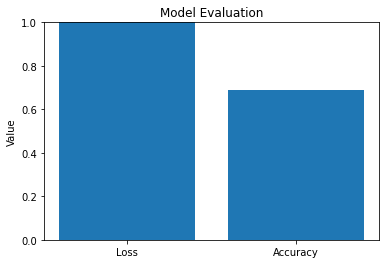

In [30]:
import matplotlib.pyplot as plt

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(['Loss', 'Accuracy'], [loss, accuracy])
plt.title('Model Evaluation')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.show()

모델 저장

In [29]:
save_path = os.getenv('HOME') + '/aiffel/mlops/best_model/2'
fname = os.path.join(save_path, 'model')
model.save(fname)

INFO:tensorflow:Assets written to: /aiffel/aiffel/mlops/best_model/2/model/assets


# 회고
---

### Keep: 라벨링을 하고 난 뒤 시각화한 것

### Problem: 어큐러시 높이자

### Try: 좀 더 정확하게 라벨링할 것